# Anscombe's Quartet - ML Edition

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) is an interesting thought experiment on accuracy metrics. We are using the same dataset, but are using standard scikit learn regression metrics used for machine learning.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# sklearn utilities
from sklearn.metrics import r2_score, mean_squared_error, max_error, median_absolute_error

In [2]:
# reading in the csv
df = pd.read_csv('Anscombes.csv')

In [3]:
df

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


Let's add the 'normal' linear regression, this will be the benchmark to compare other datasets:

In [4]:
# Simple linear function
X5 = df.X1.values
Y5 = 3.00 + 0.5*X5

# Add to the dataframe:
df['X5'] = X5
df['Y5'] = Y5

In [5]:
df

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,10,8.04,10,9.14,10,7.46,8,6.58,10,8.0
1,8,6.95,8,8.14,8,6.77,8,5.76,8,7.0
2,13,7.58,13,8.74,13,12.74,8,7.71,13,9.5
3,9,8.81,9,8.77,9,7.11,8,8.84,9,7.5
4,11,8.33,11,9.26,11,7.81,8,8.47,11,8.5
5,14,9.96,14,8.10,14,8.84,8,7.04,14,10.0
6,6,7.24,6,6.13,6,6.08,8,5.25,6,6.0
7,4,4.26,4,3.10,4,5.39,19,12.50,4,5.0
8,12,10.84,12,9.13,12,8.15,8,5.56,12,9.0
9,7,4.82,7,7.26,7,6.42,8,7.91,7,6.5


### Quick Scatter plots

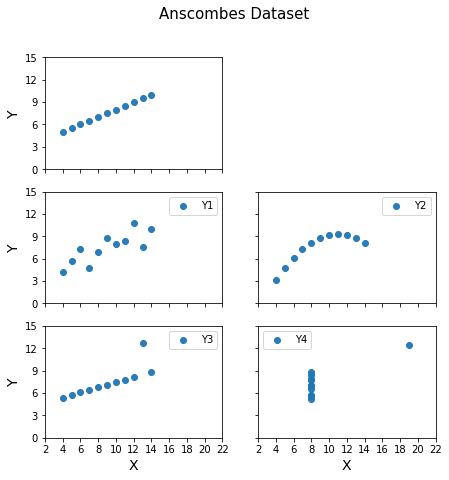

In [6]:
a = 0.95 #setting alpha

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7), sharex=True, sharey=True)

fig. suptitle('Anscombes Dataset', fontsize=15)

axs[0, 0].scatter(df.X5, df.Y5, alpha=a, label='True')
axs[0, 0].set_xticks([2,4,6,8,10,12,14,16, 18, 20,22])
axs[0, 0].set_xlim([2,22])
axs[0, 0].set_ylabel('Y', size=14)
axs[0, 0].set_yticks([0,3,6,9,12,15])
axs[0, 0].set_ylim([0,15])

axs[1, 0].scatter(df.X1, df.Y1, alpha=a,  label='Y1')
axs[1, 0].set_ylabel('Y', size=14)
axs[1, 0].legend()

axs[1, 1].scatter(df.X2, df.Y2, alpha=a, label='Y2')
axs[1, 1].legend()

axs[2, 0].scatter(df.X3, df.Y3, alpha=a, label='Y3')
axs[2, 0].legend()
axs[2, 0].set_xlabel('X', size=14)
axs[2, 0].set_ylabel('Y', size=14)

axs[2, 1].scatter(df.X4, df.Y4, alpha=a, label='Y4')
axs[2, 1].legend()
axs[2, 1].set_xlabel('X', size=14)

axs[0, 1].remove()  # don't display empty ax


## Let's compute some metrics!

Score report function:

In [7]:
def score_report(y_true_col, y_pred_col, dataframe):
    """
    Small function to print various metrics. Will not return 
    
    
    y_true_col -> column name as str
    y_pred_col -> column name as str
    dataframe  -> dataframe where both columns are
    
    """
    print('True Col:', y_true_col, 'Pred Col:', y_pred_col)
    print('r2,', r2_score(dataframe[y_true_col].values, dataframe[y_pred_col].values))
    print('RMSE,', mean_squared_error(dataframe[y_true_col].values, dataframe[y_pred_col].values, squared=False))
    print('MAE:', median_absolute_error(dataframe[y_true_col].values, dataframe[y_pred_col].values))
    print('Max Error:', max_error(dataframe[y_true_col].values, dataframe[y_pred_col].values))
    print('Mean of True y:', np.round(dataframe[y_true_col].mean(),3), 'Mean of Pred y:', np.round(dataframe[y_pred_col].mean(),3))
    print(' ')

Running the score report:

In [8]:
score_report('Y5', 'Y1', df)

score_report('Y5', 'Y2', df)

score_report('Y5', 'Y3', df)

score_report('Y5', 'Y4', df)

# Sanity check 
score_report('Y5', 'Y5', df)

True Col: Y5 Pred Col: Y1
r2, 0.4995381818181819
RMSE, 1.1185501980038917
MAE: 0.7400000000000002
Max Error: 1.92
Mean of True y: 7.5 Mean of Pred y: 7.501
 
True Col: Y5 Pred Col: Y2
r2, 0.49904363636363624
RMSE, 1.1191027249948546
MAE: 0.7599999999999998
Max Error: 1.9000000000000004
Mean of True y: 7.5 Mean of Pred y: 7.501
 
True Col: Y5 Pred Col: Y3
r2, 0.49977454545454536
RMSE, 1.1182860261863405
MAE: 0.3899999999999997
Max Error: 3.24
Mean of True y: 7.5 Mean of Pred y: 7.5
 
True Col: Y5 Pred Col: Y4
r2, -2.268454545454546
RMSE, 2.858519960335482
MAE: 1.4100000000000001
Max Error: 7.5
Mean of True y: 7.5 Mean of Pred y: 7.501
 
True Col: Y5 Pred Col: Y5
r2, 1.0
RMSE, 0.0
MAE: 0.0
Max Error: 0.0
Mean of True y: 7.5 Mean of Pred y: 7.5
 


## Closing thoughts:

R2 & RMSE look similar for Y1, Y2, and Y3. While R4 would has the same slope, the metrics really fall off. 

Between Y1 and Y2, which do you like more if it was a model result?

Which metric(s) do you like? Did I forget one?